# Baby Names from 1880-2010

This is an analysis of the data provided by the United States Social Security Administration. The data details the frequency of baby names from 1880 to present day. The project provided experience with data wrangling to load the dataset in the proper format, exposure to troubleshooting and common problems working with large data sets, and exploration of time series analysis. If there are any questions or concerns the author may be contacted to discuss analysis and methodology.

In [794]:
# Start with imports
from numpy import *
from matplotlib import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

To preview one of the text file's data, read the file using the .read_csv() function. Set the column titles to: name, sex, and births.

In [797]:
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [799]:
# Preview the data:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


To view the total births for that year group the data by sex, and then utilize the .sum() function.

In [802]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Merge all of the text files into one file. Make sure to add a column to account for each of the different birth years in the dataset. At the end of the code block, make sure to concatenate everything into a single DataFrame (and it does so row-wise).

In [805]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    names = pd.concat(pieces, ignore_index=True)

In [806]:
# Preview the data 
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


We need to aggregate the data by year and gender, to do that we will use python's .pivot_table() function. Our index will be the year and the columns will dictate the gender of the baby.

In [810]:
total_births = names.pivot_table('births', 
                                 index='year', 
                                 columns='sex', 
                                 aggfunc='sum')

In [812]:
# Preview the latter part of the data: 
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


Let's visualize the data that we have wrangled so far:

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

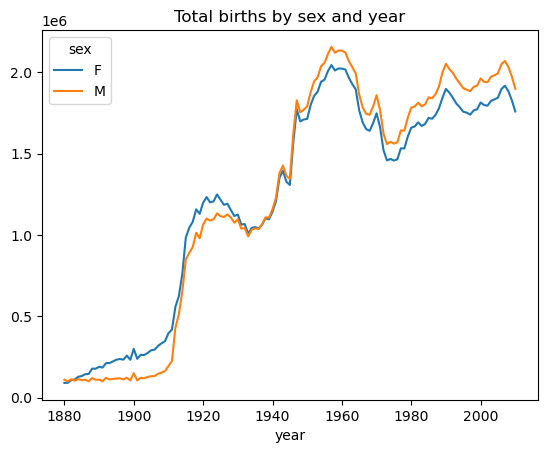

In [815]:
total_births.plot(title="Total births by sex and year")

Next manipulate the data by grouping it by year and sex, add adding a column to track the proportion of babies given certain name relative to number of births.

In [818]:
def add_prop(group):
    # Integer division floors 
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

Two things to note: make sure to reset the index prior to grouping the data due to a depreciation warming. Furthermore, for the .apply() function make sure to include a False include_groups due to a depreciation warning. At the time of this analysis there were changes to python that threw deprecation warnings. The code was updated to account for that and to refactor the code:

In [821]:
names = names.groupby(['year', 'sex']).apply(add_prop)
#names = names.reset_index(drop=True).groupby(['year', 'sex']).apply(add_prop,include_groups=False)

/var/folders/lf/rdt47vg15r91f1ss8t57lchr0000gn/T/ipykernel_18468/801961573.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [823]:
# Preview the data
names

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

Due to the large format of the dataset, perform a sanity check when executing group operations. We need to verify that the `prop` column sums to 1 for all groups. 

In [826]:
# names.groupby(['year', 'sex']).prop.sum()
np.allclose(names.groupby(level=['year','sex']).prop.sum(),1)

True

Next, extract the top 1000 names for each sex and year by performing another group operation: 

In [829]:
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]
    
grouped = names.groupby(level=['year', 'sex'])
top1000 = grouped.apply(get_top1000)
#top1000.reset_index(inplace=True, drop=True)
# Preview the data 
top1000

name sex  births  year      prop
year sex year sex                                               
1880 F   1880 F   0             Mary   F    7065  1880  0.077643
                  1             Anna   F    2604  1880  0.028618
                  2             Emma   F    2003  1880  0.022013
                  3        Elizabeth   F    1939  1880  0.021309
                  4           Minnie   F    1746  1880  0.019188
...                              ...  ..     ...   ...       ...
2010 M   2010 M   1677642     Jaydan   M     194  2010  0.000102
                  1677638     Bailey   M     194  2010  0.000102
                  1677640     Destin   M     194  2010  0.000102
                  1677639     Camilo   M     194  2010  0.000102
                  1677643       Crew   M     193  2010  0.000102

[261877 rows x 5 columns]

## Analyzing Naming Trends
Prepare our analysis of naming trends by splitting the top 1000 names into assigned genders:

In [832]:
print(names.index.names)
print(names.columns)
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

['year', 'sex', None]
Index(['name', 'sex', 'births', 'year', 'prop'], dtype='object')


A simple time series is plotted with a pivot table of the total number of births by year and names. A bit of effort is needed to implement extra code to perform a bit of data munging. First we need both year and sex as index, so we start by resetting the index if 'year' is already an index:

In [835]:
top1000 = top1000.reset_index(drop=True) if 'year' in top1000.index.names else top1000

Next, we create the pivot table with the following requirements:
- The births need to be aggregated as the values
- Year and sex are declared as the index
- Set name as the columns
- Declare the aggregate function as sum

In [838]:
total_births = top1000.pivot_table(values='births', 
                                   index=['year'], 
                                   columns='name', 
                                   aggfunc='sum')

Display the graph:

In [841]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,5.0,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


Print a concise summary of the dataframe. Make sure to include information on the index, column, and plot the data for a handful of names.

In [844]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6861 entries, Aaden to Zuri
dtypes: float64(6861)
memory usage: 6.9 MB


In [846]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

Preview the data:

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

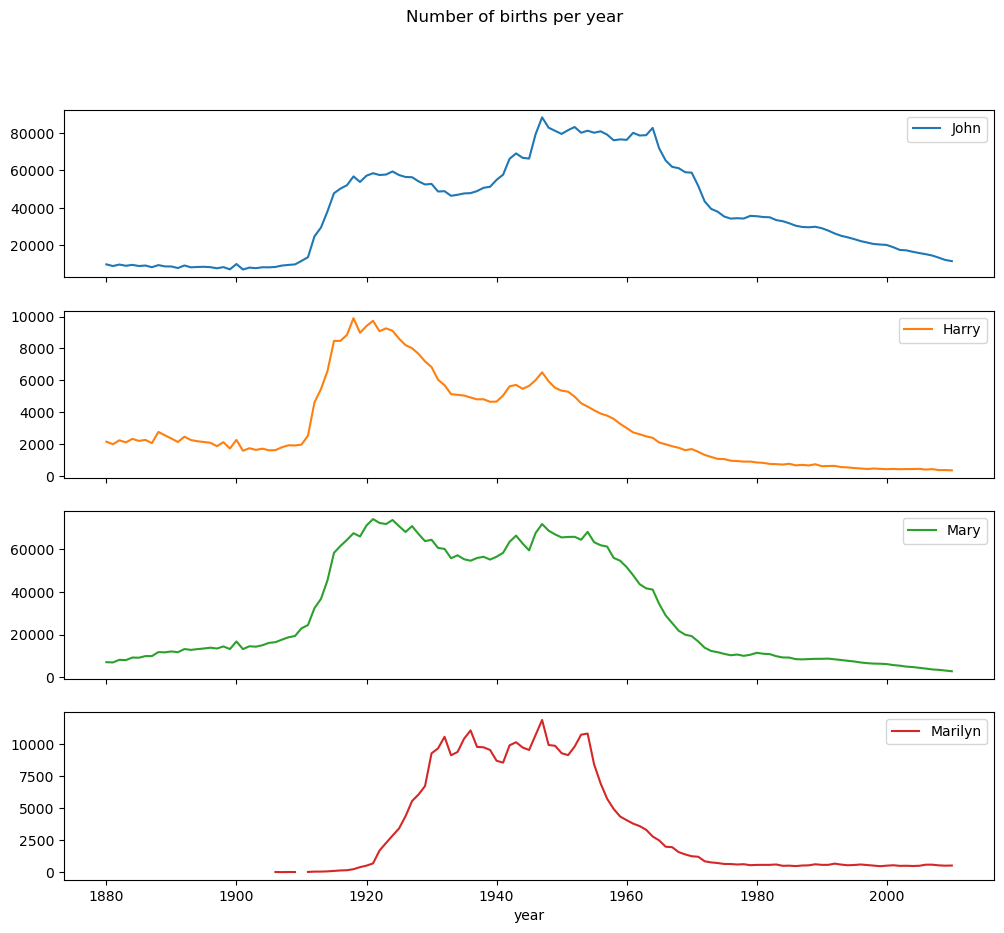

In [849]:
subset.plot(subplots=True, 
            figsize=(12, 10), 
            grid=False, 
            title='Number of births per year')

## Measuring the increase in naming diversity:
We notice in the plots that there is a severe drop off on the number of names. Let's explore the hypthesis that fewer parents were choosing common names for their children. For instance, let's analyze the name Allison:

In [852]:
subseta = total_births[['Alison']]

<Axes: title={'center': 'Decrease of Popularity of the Name: Alison'}, xlabel='year'>

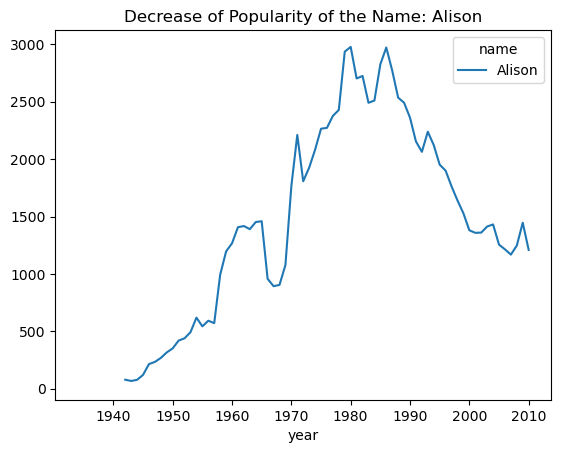

In [854]:
subseta.plot(title='Decrease of Popularity of the Name: Alison')

To measure the increase in naming diversity create a pivot table where: 
- The values are declared as the variable prop.
- The index is set to year.
- Declare the columns as sex.
- The aggregate function is declared as sum.

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

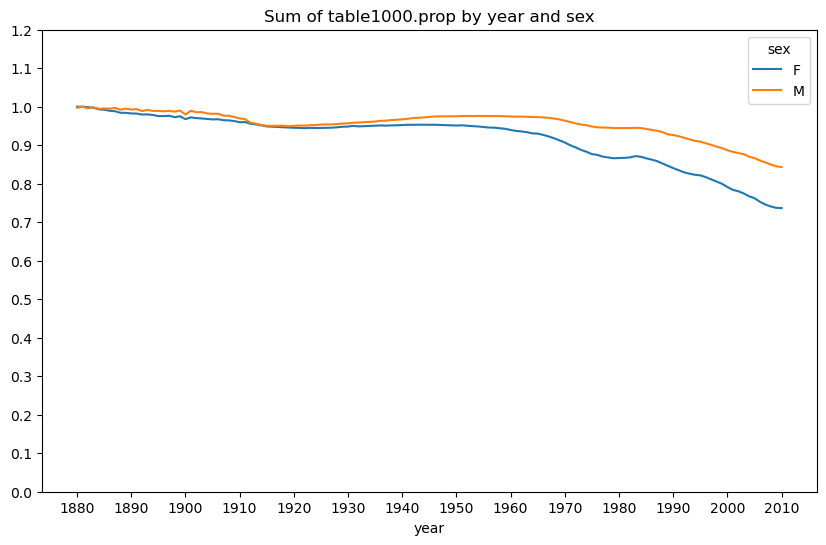

In [857]:
table = top1000.pivot_table(values='prop', 
                            index='year', 
                            columns='sex', 
                            aggfunc='sum')
table.plot(title='Sum of table1000.prop by year and sex', 
           figsize=(10, 6), 
           yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020,10))

Declare a new dataframe for the number of distinct names (in popularity of highest to lowest) in the top 50 births per year. 

In [860]:
df = boys[boys.year == 2010]

In [862]:
# Preview the data
df

name sex  births  year      prop
year sex year sex                                             
2010 M   2010 M   1676644    Jacob   M   21875  2010  0.011523
                  1676645    Ethan   M   17866  2010  0.009411
                  1676646  Michael   M   17133  2010  0.009025
                  1676647   Jayden   M   17030  2010  0.008971
                  1676648  William   M   16870  2010  0.008887
...                            ...  ..     ...   ...       ...
                  1677642   Jaydan   M     194  2010  0.000102
                  1677638   Bailey   M     194  2010  0.000102
                  1677640   Destin   M     194  2010  0.000102
                  1677639   Camilo   M     194  2010  0.000102
                  1677643     Crew   M     193  2010  0.000102

[1000 rows x 5 columns]

Sort in descending order by coding a vectorized NumPy. We do this by taking the cumulative sum of prop and eventually setting the .searchsorted() function to 0.5: 

In [865]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [867]:
# Preview the data
prop_cumsum[:10]

year  sex  year  sex         
2010  M    2010  M    1676644    0.011523
                      1676645    0.020934
                      1676646    0.029959
                      1676647    0.038930
                      1676648    0.047817
                      1676649    0.056579
                      1676650    0.065155
                      1676651    0.073414
                      1676652    0.081528
                      1676653    0.089621
Name: prop, dtype: float64

In [869]:
prop_cumsum.values.searchsorted(0.5)

116

Compare this median point to 1990 where it was much smalller:

Compare this median point to 1990 to when the median point was much smalller: 

In [873]:
df = boys[boys.year == 1990]

In [874]:
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [877]:
in1990.values.searchsorted(0.5) + 1

45

Make a function to return the count for each group. The operation should take each (year/sex) combo by fields and perform the calculation. The new dataframe (diversity) now has two time series (one for each sex indexed by year): 

In [880]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count, include_groups=False)
diversity = diversity.unstack('sex')

In [882]:
# Preview the data
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

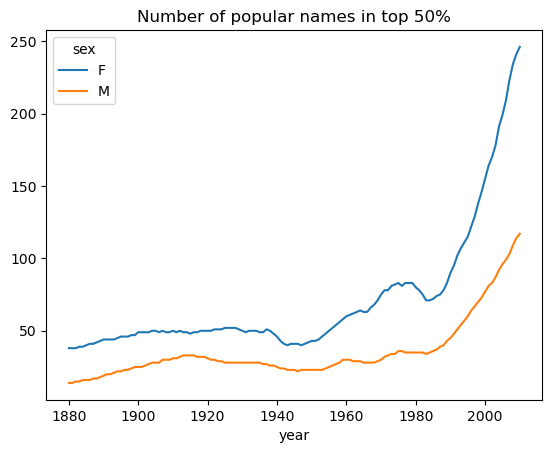

In [883]:
diversity.plot(title="Number of popular names in top 50%")

## Analyzing the "Last-Letter"
As we in the previous graph, girls' names have always exhibited more diversity than boys'. Overall, we see that girls names became more diverse over time. Next let's analyze what is causing the diversity in names by exploring the "last-letter" revolution.

Start the analysis of the "last letter" by aggregating all births in the FULL dataset by year, sex, and final letter. Next we will extract last letter from name column:

In [887]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

First, ensure we have a clean dataframe with last_letters: 

In [889]:
names = names.assign(last_letter=last_letters)

Make sure to completely reset the index to avoid any conflicts

In [893]:
names_reset = names.reset_index(drop=True)

Create pivot table with clear index and column structure: 

In [896]:
table = names_reset.pivot_table(
    values='births',
    index='last_letter',
    columns=['year', 'sex'],
    aggfunc='sum'
)

Randomly sample 3 years and print a few rows of data:

In [899]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [900]:
subtable.head()

year             1910               1960                2010          
sex                 F        M         F         M         F         M
last_letter                                                           
a            108376.0    977.0  691247.0    5204.0  670605.0   28438.0
b                 NaN    411.0     694.0    3912.0     450.0   38859.0
c                 5.0    482.0      49.0   15476.0     946.0   23125.0
d              6750.0  22111.0    3729.0  262112.0    2607.0   44398.0
e            133569.0  28655.0  435013.0  178823.0  313833.0  129012.0

Create a new table by normalizing the table by total births to get the proportion of total births for each sex for each ending letter: 

In [904]:
subtable.sum()

year  sex
1910  F       396416.0
      M       194198.0
1960  F      2022062.0
      M      2132588.0
2010  F      1759010.0
      M      1898382.0
dtype: float64

In [906]:
letter_prop = subtable / subtable.sum()

In [908]:
letter_prop

year             1910                1960                2010          
sex                 F         M         F         M         F         M
last_letter                                                            
a            0.273390  0.005031  0.341853  0.002440  0.381240  0.014980
b                 NaN  0.002116  0.000343  0.001834  0.000256  0.020470
c            0.000013  0.002482  0.000024  0.007257  0.000538  0.012181
d            0.017028  0.113858  0.001844  0.122908  0.001482  0.023387
e            0.336941  0.147556  0.215133  0.083853  0.178415  0.067959
f                 NaN  0.000783  0.000010  0.004325  0.000055  0.001188
g            0.000144  0.002250  0.000157  0.009488  0.000374  0.001404
h            0.051529  0.045562  0.036224  0.037907  0.075852  0.051670
i            0.001526  0.000844  0.039965  0.000603  0.031734  0.022628
j                 NaN       NaN       NaN       NaN  0.000090  0.000769
k            0.000121  0.036581  0.000156  0.049384  0.000356  0.018541
l            0.043189  0.065016  0.033867  0.104904  0.026356  0.070367
m            0.001201  0.058044  0.008613  0.033827  0.002588  0.024657
n            0.079240  0.143415  0.130687  0.152522  0.140210  0.362771
o            0.001660  0.017065  0.002439  0.012829  0.001243  0.042681
p            0.000018  0.003172  0.000023  0.005675  0.000020  0.001269
q                 NaN       NaN       NaN       NaN  0.000030  0.000180
r            0.013390  0.064481  0.006764  0.031034  0.018025  0.087477
s            0.039042  0.130815  0.012764  0.102730  0.013332  0.065145
t            0.027438  0.072879  0.015201  0.065655  0.007830  0.022861
u            0.000684  0.000124  0.000574  0.000057  0.000417  0.001221
v                 NaN  0.000113  0.000060  0.000037  0.000117  0.001434
w            0.000020  0.006329  0.000031  0.007711  0.001182  0.016148
x            0.000015  0.003965  0.000037  0.001851  0.000727  0.008614
y            0.110972  0.077349  0.152569  0.160987  0.116828  0.058168
z            0.002439  0.000170  0.000659  0.000184  0.000704  0.001831

First, let's check the structure of your DataFrame: 

In [911]:
print("DataFrame index levels:", letter_prop.index.names)
print("\nDataFrame head:\n", letter_prop.head())

DataFrame index levels: ['last_letter']

DataFrame head:
 year             1910                1960                2010          
sex                 F         M         F         M         F         M
last_letter                                                            
a            0.273390  0.005031  0.341853  0.002440  0.381240  0.014980
b                 NaN  0.002116  0.000343  0.001834  0.000256  0.020470
c            0.000013  0.002482  0.000024  0.007257  0.000538  0.012181
d            0.017028  0.113858  0.001844  0.122908  0.001482  0.023387
e            0.336941  0.147556  0.215133  0.083853  0.178415  0.067959


Create separate DataFrames for male and female using MultiIndex and use xs (cross-section) to select data for each sex: 

In [914]:
male_data = letter_prop.xs('M', level='sex', axis=1)
female_data = letter_prop.xs('F', level='sex', axis=1)

Verify that we have the proper data: 

In [917]:
if male_data.empty or female_data.empty:
    print("Warning: No data found for one or both sexes. Please check your data.")

Create a bar plot for each sex:

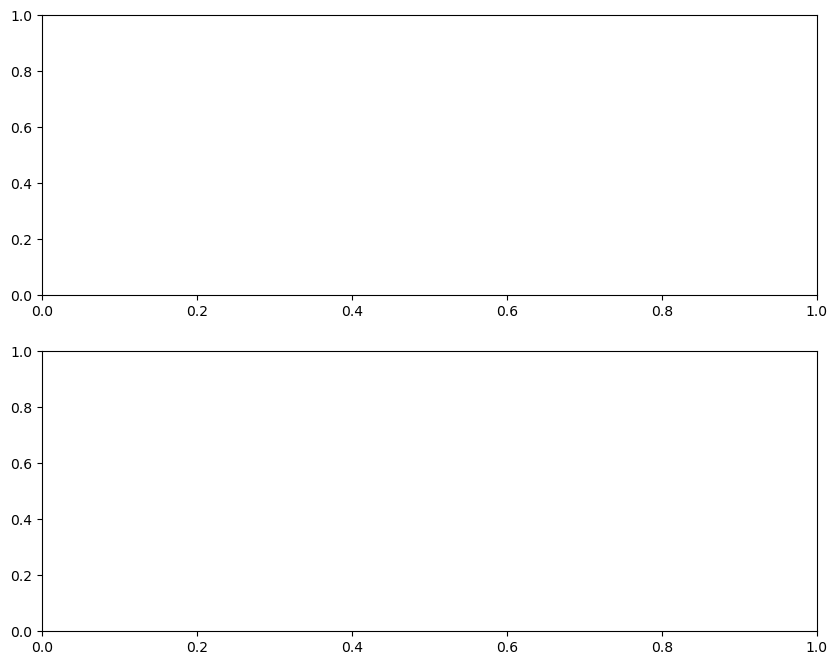

In [920]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

Plot data:

In [924]:
male_data.plot(kind='bar', rot=0, ax=axes[0], title='Male')
female_data.plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

In [926]:
# Adjust layout to prevent overlap
plt.tight_layout()

# Print the structure of the MultiIndex for reference
print("\nMultiIndex structure:")
print(letter_prop.columns)


MultiIndex structure:
MultiIndex([(1910, 'F'),
            (1910, 'M'),
            (1960, 'F'),
            (1960, 'M'),
            (2010, 'F'),
            (2010, 'M')],
           names=['year', 'sex'])


<Figure size 640x480 with 0 Axes>